In [1]:
import pandas as pd
import re
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import pandas as pd
from matplotlib import pyplot as plt
from dateutil import parser
import seaborn as sb

Importing plotly failed. Interactive plots will not work.


### 빈도가 높은 구 지구.
1. 관악구
2. 영등포구
3. 동작구
4. 양천구
5. 서초구,

In [2]:
data_frames2013 ={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2013={}
for i in range(1, 31):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2013/TV_RAINGAUGEINFO_2013_{i}.csv"
    data_frames2013[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')

gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 31):
        key = f'df_{i}'


        filtered_df = data_frames2013[key][data_frames2013[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)

for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2013[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()

for gu_name in gu_names:
    df2013[gu_name] = df2013[gu_name].apply(lambda x: x if x > 0 else 0)
df2013

{'종로구': DATE
 2013-01-01    0.0
 2013-01-02    0.0
 2013-01-03    0.0
 2013-01-04    0.0
 2013-01-05    0.0
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 2013-12-30    0.0
 2013-12-31    0.0
 Name: RAINFALLACCU, Length: 354, dtype: float64,
 '중구': DATE
 2013-01-01    0.0
 2013-01-02    0.0
 2013-01-03    0.0
 2013-01-04    0.0
 2013-01-05    0.5
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 2013-12-30    0.0
 2013-12-31    0.0
 Name: RAINFALLACCU, Length: 363, dtype: float64,
 '용산구': DATE
 2013-01-01    0.0
 2013-01-02    0.0
 2013-01-03    0.0
 2013-01-04    0.0
 2013-01-05    0.5
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 2013-12-30    0.0
 2013-12-31    0.0
 Name: RAINFALLACCU, Length: 347, dtype: float64,
 '성동구': DATE
 2013-01-05    0.0
 2013-01-06    0.5
 2013-01-07    0.5
 2013-01-08    0.0
 2013-01-09    0.0
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 

### 하루에 80mm이상 내리면 집중호우

In [3]:
top5 = ['관악구','영등포구','동작구','양천구',"서초구"]

In [4]:
count2013={}
for gu in top5:
    count2013[gu] = len(df2013[gu][df2013[gu] >= 80])
count2013


{'관악구': 3, '영등포구': 1, '동작구': 5, '양천구': 3, '서초구': 3}

In [5]:
data_frames2014 ={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2014={}
for i in range(1, 31):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2014/TV_RAINGAUGEINFO_2014_{i}.csv"
    data_frames2014[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
df_list = [f'df_{i}' for i in range(1, 31)]
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 31):
        key = f'df_{i}'


        filtered_df = data_frames2014[key][data_frames2014[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
        
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2014[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
    
for gu_name in gu_names:
    df2014[gu_name] = df2014[gu_name].apply(lambda x: x if x > 0 else 0)
df2014

{'종로구': DATE
 2014-01-01    0.0
 2014-01-02    0.0
 2014-01-03    0.0
 2014-01-04    0.0
 2014-01-05    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 2014-12-30    0.0
 2014-12-31    0.0
 Name: RAINFALLACCU, Length: 310, dtype: float64,
 '중구': DATE
 2014-01-10    0.0
 2014-01-11    0.0
 2014-01-12    0.0
 2014-01-13    0.0
 2014-01-14    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 2014-12-30    0.0
 2014-12-31    0.0
 Name: RAINFALLACCU, Length: 319, dtype: float64,
 '용산구': DATE
 2014-01-10    0.0
 2014-01-11    0.0
 2014-01-12    0.0
 2014-01-13    0.0
 2014-01-14    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 2014-12-30    0.0
 2014-12-31    0.0
 Name: RAINFALLACCU, Length: 299, dtype: float64,
 '성동구': DATE
 2014-01-10    0.0
 2014-01-11    0.0
 2014-01-12    0.0
 2014-01-13    0.0
 2014-01-14    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 

In [6]:
count2014={}
for gu in top5:
    count2014[gu] = len(df2014[gu][df2014[gu] >= 80])
count2014


{'관악구': 3, '영등포구': 1, '동작구': 0, '양천구': 1, '서초구': 1}

In [7]:
data_frames2015 ={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2015={}
for i in range(1,24):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2015/TV_RAINGAUGEINFO_2015_{i}.csv"
    data_frames2015[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
df_list = [f'df_{i}' for i in range(1, 24)]
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 24):
        key = f'df_{i}'


        filtered_df = data_frames2015[key][data_frames2015[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2015[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
for gu_name in gu_names:
    df2015[gu_name] = df2015[gu_name].apply(lambda x: x if x > 0 else 0)
df2015

{'종로구': DATE
 2015-01-01      0.0
 2015-01-02    829.0
 2015-01-03      0.0
 2015-01-04      0.0
 2015-01-05      0.5
               ...  
 2015-12-27      0.5
 2015-12-28      0.0
 2015-12-29      0.0
 2015-12-30      2.0
 2015-12-31      0.5
 Name: RAINFALLACCU, Length: 222, dtype: float64,
 '중구': DATE
 2015-01-01    0.0
 2015-01-02    0.0
 2015-01-03    0.0
 2015-01-04    0.0
 2015-01-05    0.0
              ... 
 2015-12-27    0.0
 2015-12-28    0.0
 2015-12-29    0.0
 2015-12-30    2.5
 2015-12-31    0.0
 Name: RAINFALLACCU, Length: 222, dtype: float64,
 '용산구': DATE
 2015-01-01    0.0
 2015-01-02    0.0
 2015-01-03    0.0
 2015-01-04    0.0
 2015-01-05    0.5
              ... 
 2015-12-27    0.0
 2015-12-28    0.0
 2015-12-29    0.0
 2015-12-30    1.0
 2015-12-31    0.0
 Name: RAINFALLACCU, Length: 217, dtype: float64,
 '성동구': DATE
 2015-01-01    0.0
 2015-01-02    0.0
 2015-01-03    0.0
 2015-01-04    0.0
 2015-01-05    0.5
              ... 
 2015-12-27    0.0
 2015-12-28    0.

In [8]:
count2015={}
for gu in top5:
    count2015[gu] = len(df2015[gu][df2015[gu] >= 80])
count2015


{'관악구': 1, '영등포구': 1, '동작구': 1, '양천구': 1, '서초구': 1}

In [9]:
data_frames2016={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2016={}
for i in range(1, 36):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2016/TV_RAINGAUGEINFO_2016_{i}.csv"
    data_frames2016[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
df_list = [f'df_{i}' for i in range(1, 31)]
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 36):
        key = f'df_{i}'


        filtered_df = data_frames2016[key][data_frames2016[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2016[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
for gu_name in gu_names:
    df2016[gu_name] = df2016[gu_name].apply(lambda x: x if x > 0 else 0)
df2016

{'종로구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 2016-11-02    0.5
 2016-11-03    0.0
 Name: RAINFALLACCU, Length: 300, dtype: float64,
 '중구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 2016-11-02    0.0
 2016-11-03    0.0
 Name: RAINFALLACCU, Length: 296, dtype: float64,
 '용산구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 2016-11-02    0.0
 2016-11-03    0.0
 Name: RAINFALLACCU, Length: 294, dtype: float64,
 '성동구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 

In [10]:
count2016={}
for gu in top5:
    count2016[gu] = len(df2016[gu][df2016[gu] >= 80])
count2016


{'관악구': 2, '영등포구': 1, '동작구': 2, '양천구': 2, '서초구': 2}

In [11]:
data_frames2017={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2017={}
for i in range(1, 9):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2017/TV_RAINGAUGEINFO_2017_{i}.csv"
    data_frames2017[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 9):
        key = f'df_{i}'


        filtered_df = data_frames2017[key][data_frames2017[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2017[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
for gu_name in gu_names:
    df2017[gu_name] = df2017[gu_name].apply(lambda x: x if x > 0 else 0)
df2017

{'종로구': DATE
 2017-03-11     0.0
 2017-06-12    95.0
 2017-06-13     0.0
 2017-06-14     0.0
 2017-06-15     0.0
               ... 
 2017-12-27     0.0
 2017-12-28     0.0
 2017-12-29     0.0
 2017-12-30     1.0
 2017-12-31     0.0
 Name: RAINFALLACCU, Length: 68, dtype: float64,
 '중구': DATE
 2017-03-11      0.0
 2017-06-12    108.0
 2017-06-13      0.0
 2017-06-14      0.0
 2017-06-15      0.0
               ...  
 2017-12-27      0.0
 2017-12-28      0.0
 2017-12-29      0.0
 2017-12-30      1.5
 2017-12-31      0.5
 Name: RAINFALLACCU, Length: 68, dtype: float64,
 '용산구': DATE
 2017-06-12    0.0
 2017-06-13    0.0
 2017-06-14    0.0
 2017-06-15    0.0
 2017-06-16    0.0
              ... 
 2017-12-27    0.0
 2017-12-28    0.0
 2017-12-29    0.0
 2017-12-30    2.0
 2017-12-31    0.5
 Name: RAINFALLACCU, Length: 67, dtype: float64,
 '성동구': DATE
 2017-03-11      0.0
 2017-06-12    107.0
 2017-06-13      0.0
 2017-06-14      0.0
 2017-06-15      0.0
               ...  
 2017-12-27     

In [12]:
count2017={}
for gu in top5:
    count2017[gu] = len(df2017[gu][df2017[gu] >= 80])
count2017


{'관악구': 2, '영등포구': 4, '동작구': 3, '양천구': 4, '서초구': 3}

In [13]:
data_frames2018={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2018={}
for i in range(1, 41):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2018/TV_RAINGAUGEINFO_2018_{i}.csv"
    data_frames2018[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 41):
        key = f'df_{i}'


        filtered_df = data_frames2018[key][data_frames2018[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2018[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
for gu_name in gu_names:
    df2018[gu_name] = df2018[gu_name].apply(lambda x: x if x > 0 else 0)
df2018

{'종로구': DATE
 2018-01-08    0.0
 2018-01-09    0.0
 2018-01-10    0.0
 2018-01-11    0.0
 2018-01-12    0.0
              ... 
 2018-12-27    0.0
 2018-12-28    0.0
 2018-12-29    0.0
 2018-12-30    0.0
 2018-12-31    0.0
 Name: RAINFALLACCU, Length: 349, dtype: float64,
 '중구': DATE
 2018-01-08    0.0
 2018-01-09    0.0
 2018-01-10    0.0
 2018-01-11    0.0
 2018-01-12    0.0
              ... 
 2018-12-27    0.0
 2018-12-28    0.0
 2018-12-29    0.0
 2018-12-30    0.0
 2018-12-31    0.0
 Name: RAINFALLACCU, Length: 351, dtype: float64,
 '용산구': DATE
 2018-01-01    0.0
 2018-01-08    0.0
 2018-01-09    0.0
 2018-01-10    0.0
 2018-01-22    1.0
              ... 
 2018-12-27    0.0
 2018-12-28    0.0
 2018-12-29    0.0
 2018-12-30    0.0
 2018-12-31    0.0
 Name: RAINFALLACCU, Length: 323, dtype: float64,
 '성동구': DATE
 2018-01-08    0.0
 2018-01-09    0.0
 2018-01-10    0.0
 2018-01-11    0.0
 2018-01-12    0.0
              ... 
 2018-12-27    0.0
 2018-12-28    0.0
 2018-12-29    0.0
 

In [14]:
count2018={}
for gu in top5:
    count2018[gu] = len(df2018[gu][df2018[gu] >= 80])
count2018


{'관악구': 3, '영등포구': 2, '동작구': 2, '양천구': 2, '서초구': 7}

In [15]:
data_frames2019={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2019={}
for i in range(1, 34):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2019/TV_RAINGAUGEINFO_2019_{i}.csv"
    data_frames2019[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 34):
        key = f'df_{i}'


        filtered_df = data_frames2019[key][data_frames2019[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    data[gu_name]['RAINFALLACCU'] = pd.to_numeric(data[gu_name]['RAINFALLACCU'], errors='coerce')
    data[gu_name]['RAINFALLACCU'].fillna(0, inplace=True)

    df2019[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
for gu_name in gu_names:
    df2019[gu_name] = df2019[gu_name].apply(lambda x: x if x > 0 else 0)
df2019

C:\Users\yis82\AppData\Local\Temp\ipykernel_9568\769352830.py:8: DtypeWarning: Columns (0,2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames2019[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')


{'종로구': DATE
 2019-02-03    0.0
 2019-02-04    0.0
 2019-02-05    0.0
 2019-02-06    0.0
 2019-02-07    1.0
              ... 
 2019-12-27    0.0
 2019-12-28    0.0
 2019-12-29    1.0
 2019-12-30    0.5
 2019-12-31    0.0
 Name: RAINFALLACCU, Length: 274, dtype: float64,
 '중구': DATE
 2019-02-03    0.0
 2019-02-04    0.0
 2019-02-05    0.0
 2019-02-06    0.0
 2019-02-07    0.5
              ... 
 2019-12-27    0.0
 2019-12-28    0.0
 2019-12-29    1.5
 2019-12-30    0.0
 2019-12-31    0.0
 Name: RAINFALLACCU, Length: 251, dtype: float64,
 '용산구': DATE
 2019-02-03       0.0
 2019-02-04       0.0
 2019-02-05       0.0
 2019-02-06       0.0
 2019-02-07       0.5
                ...  
 2019-12-27    1025.0
 2019-12-28       0.0
 2019-12-29       2.0
 2019-12-30       0.0
 2019-12-31       0.0
 Name: RAINFALLACCU, Length: 275, dtype: float64,
 '성동구': DATE
 2019-02-03    0.0
 2019-02-04    0.0
 2019-02-05    0.0
 2019-02-06    0.0
 2019-02-07    0.5
              ... 
 2019-12-27    0.0
 2019-

In [16]:
count2019={}
for gu in top5:
    count2019[gu] = len(df2019[gu][df2019[gu] >= 80])
count2019


{'관악구': 1, '영등포구': 1, '동작구': 1, '양천구': 1, '서초구': 1}

In [ ]:
data_frames2021 = {}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2021={}
for i in range(1, 13):
    file_path = f"./데이터/서울시_강우량_정보_2021년/서울시_강우량_정보_2021년{i}월.csv"
    data_frames2021[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 13):
        key = f'df_{i}'


        filtered_df = data_frames2021[key][data_frames2021[key]['구청명'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)

for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['자료수집 시각'].dt.date
for gu_name in gu_names:
    df2021[gu_name] = data[gu_name].groupby("DATE")['10분우량'].sum()
df2021

In [45]:
data_frames2021 = {}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2021={}
for i in range(1, 13):
    file_path = f"./데이터/서울시_강우량_정보_2021년/서울시_강우량_정보_2021년{i}월.csv"
    data_frames2021[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 13):
        key = f'df_{i}'


        filtered_df = data_frames2021[key][data_frames2021[key]['구청명'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)

for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['자료수집 시각'].dt.date
for gu_name in gu_names:
    df2021[gu_name] = data[gu_name].groupby("DATE")['10분우량'].sum()
df2021

{'종로구': DATE
 2021-01-04    0.0
 2021-01-13    5.5
 2021-01-14    0.0
 2021-01-15    0.0
 2021-01-16    0.0
              ... 
 2021-12-27    0.0
 2021-12-28    0.0
 2021-12-29    0.0
 2021-12-30    0.0
 2021-12-31    0.0
 Name: 10분우량, Length: 331, dtype: float64,
 '중구': DATE
 2021-01-04    0.0
 2021-01-13    5.5
 2021-01-14    0.0
 2021-01-15    0.0
 2021-01-16    0.0
              ... 
 2021-12-27    0.0
 2021-12-28    0.0
 2021-12-29    0.0
 2021-12-30    0.0
 2021-12-31    0.0
 Name: 10분우량, Length: 331, dtype: float64,
 '용산구': DATE
 2021-01-04    0.0
 2021-01-10    0.0
 2021-01-11    0.0
 2021-01-12    0.5
 2021-01-13    6.0
              ... 
 2021-12-27    0.0
 2021-12-28    0.0
 2021-12-29    0.0
 2021-12-30    0.0
 2021-12-31    0.0
 Name: 10분우량, Length: 347, dtype: float64,
 '성동구': DATE
 2021-01-04    0.0
 2021-01-13    3.5
 2021-01-14    0.0
 2021-01-15    0.0
 2021-01-16    0.0
              ... 
 2021-12-27    0.0
 2021-12-28    0.0
 2021-12-29    0.5
 2021-12-30    0.0
 20

In [17]:
data_frames2022 = {}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2022={}
for i in range(1, 13):
    file_path = f"./데이터/서울시_강우량_정보_2022년/서울시_강우량_정보_2022년{i}월.csv"
    data_frames2022[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 13):
        key = f'df_{i}'


        filtered_df = data_frames2022[key][data_frames2022[key]['구청명'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)

for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['자료수집 시각'] = pd.to_datetime(data[gu_name]['자료수집 시각'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['자료수집 시각'].dt.date
for gu_name in gu_names:
    df2022[gu_name] = data[gu_name].groupby("DATE")['10분우량'].sum()
df2022

{'종로구': DATE
 2022-01-01    0.0
 2022-01-14    0.0
 2022-01-20    0.5
 2022-01-21    0.0
 2022-01-22    0.0
              ... 
 2022-12-27    0.0
 2022-12-28    0.0
 2022-12-29    0.0
 2022-12-30    0.0
 2022-12-31    0.0
 Name: 10분우량, Length: 346, dtype: float64,
 '중구': DATE
 2022-01-01    0.0
 2022-01-20    0.5
 2022-01-21    0.0
 2022-01-22    0.0
 2022-01-23    0.0
              ... 
 2022-12-27    0.5
 2022-12-28    0.0
 2022-12-29    0.0
 2022-12-30    0.0
 2022-12-31    0.0
 Name: 10분우량, Length: 344, dtype: float64,
 '용산구': DATE
 2022-01-01    0.0
 2022-01-02    0.0
 2022-01-03    0.0
 2022-01-04    0.0
 2022-01-05    0.0
              ... 
 2022-12-27    0.0
 2022-12-28    0.0
 2022-12-29    0.0
 2022-12-30    0.0
 2022-12-31    0.0
 Name: 10분우량, Length: 363, dtype: float64,
 '성동구': DATE
 2022-01-01    0.0
 2022-01-14    0.0
 2022-01-20    0.0
 2022-01-21    0.0
 2022-01-22    0.0
              ... 
 2022-12-27    0.0
 2022-12-28    0.0
 2022-12-29    0.0
 2022-12-30    0.0
 20

In [18]:
count2022={}
for gu in top5:
    count2022[gu] = len(df2022[gu][df2022[gu] >= 80])
count2022

{'관악구': 10, '영등포구': 8, '동작구': 9, '양천구': 8, '서초구': 12}

In [47]:
import pandas as pd

def 집중호우(gu_name):
    # Define dictionaries to store the counts for each year
    counts = {
        2013: len(df2013[gu_name][df2013[gu_name] >= 80]),
        2014: len(df2014[gu_name][df2014[gu_name] >= 80]),
        2015: len(df2015[gu_name][df2015[gu_name] >= 80]),
        2016: len(df2016[gu_name][df2016[gu_name] >= 80]),
        2017: len(df2017[gu_name][df2017[gu_name] >= 80]),
        2018: len(df2018[gu_name][df2018[gu_name] >= 80]),
        2019: len(df2019[gu_name][df2019[gu_name] >= 80]),
        2021: len(df2021[gu_name][df2021[gu_name] >= 80]),
        2022: len(df2022[gu_name][df2022[gu_name] >= 80])
    }

    return counts

# Create a DataFrame to store the results
results = []

for gu_name in gu_names:
    counts = 집중호우(gu_name)
    counts['District'] = gu_name
    results.append(counts)

results_df = pd.DataFrame(results)

# Set the "District" column as the index
results_df.set_index('District', inplace=True)

# Print the DataFrame
results_df

,2013,2014,2015,2016,2017,2018,2019,2021,2022
District,,,,,,,,,
종로구,2,1,2,2,5,5,1,8,11
중구,2,0,1,2,4,2,1,6,12
용산구,3,1,1,3,3,3,3,6,9
성동구,3,1,1,2,5,2,3,7,11
광진구,3,1,1,2,3,2,1,1,6
동대문구,3,1,1,2,5,2,1,8,12
중랑구,3,1,1,2,5,2,1,7,12
성북구,3,1,1,2,5,2,1,7,11
강북구,3,0,1,2,5,4,1,0,7


array(['갈현1동', '서대문구청', '증산P', '마포구청', '종로구청', '봉원P', '중구청', '광진구청',
       '은평구청', '부암동', '용산구청', '구로구청', '양천구청', '목동P', '개봉2동', '신림P',
       '동작구청', '관악구청', '서초구청', '강남구청', '마천2동', '송파구청', '반포P', '노원구청',
       '강북구청', '중랑구청', '상계1동', '면목P', '동대문구청', '성동구청', '세곡동', '뚝섬P',
       '휘경P', '금천구청', '개포2동', '강동구청', '고덕2동', '공항동P', '강서구청', '도림2동P',
       '영등포구청', '도봉구청', '성북구청', '상월곡동'], dtype=object)

In [36]:
a = 집중호우('강서구')
a

2013     1
2014     1
2015     1
2016     2
2017     4
2018     1
2019     2
2022    12
dtype: int64

In [ ]:
관악구 = pd.Series([count2013['관악구'],count2014['관악구'],count2015['관악구'],count2016['관악구'],count2017['관악구'],count2018['관악구'],count2019['관악구'],count2022['관악구']],index=[2013, 2014, 2015, 2016, 2017, 2018, 2019,2022])
관악구

2013     3
2014     3
2015     1
2016     2
2017     2
2018     3
2019     1
2022    10
dtype: int64

In [ ]:
동작구 = pd.Series([count2013['동작구'],count2014['동작구'],count2015['동작구'],count2016['동작구'],count2017['동작구'],count2018['동작구'],count2019['동작구'],count2022['동작구']]
                ,index=[2013, 2014, 2015, 2016, 2017, 2018, 2019,2022])
동작구

2013    5
2014    0
2015    1
2016    2
2017    3
2018    2
2019    1
2022    9
dtype: int64

In [ ]:
영등포구 = pd.Series([count2013['영등포구'],count2014['영등포구'],count2015['영등포구'],count2016['영등포구'],count2017['영등포구'],count2018['영등포구'],count2019['영등포구'],count2022['영등포구']]
                 ,index=[2013, 2014, 2015, 2016, 2017, 2018, 2019,2022])
영등포구

2013    1
2014    1
2015    1
2016    1
2017    4
2018    2
2019    1
2022    8
dtype: int64

In [ ]:
양천구 = pd.Series([count2013['양천구'],count2014['양천구'],count2015['양천구'],count2016['양천구'],count2017['양천구'],count2018['양천구'],count2019['양천구'],count2022['양천구']]
                ,index=[2013, 2014, 2015, 2016, 2017, 2018, 2019,2022])
양천구

2013    3
2014    1
2015    1
2016    2
2017    4
2018    2
2019    1
2022    8
dtype: int64

In [ ]:
서초구 = pd.Series([count2013['서초구'],count2014['서초구'],count2015['서초구'],count2016['서초구'],count2017['서초구'],count2018['서초구'],count2019['서초구'],count2022['서초구']]
                ,index=[2013, 2014, 2015, 2016, 2017, 2018, 2019,2022])
서초구

2013     3
2014     1
2015     1
2016     2
2017     3
2018     7
2019     1
2022    12
dtype: int64

<Axes: >

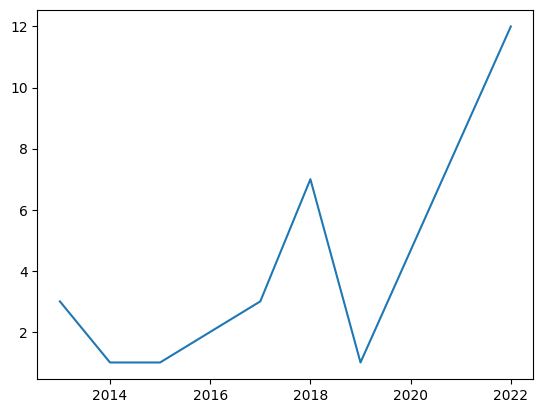

In [ ]:
sb.lineplot(data=서초구)

<Axes: >

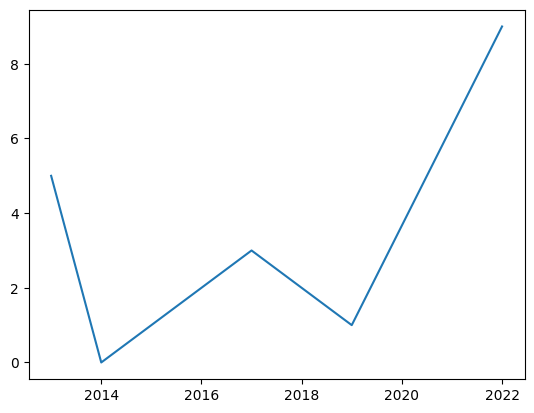

In [ ]:
sb.lineplot(data=동작구)

In [ ]:
sb.lineplot('')

In [ ]:
서초구df = pd.DataFrame(서초구 , columns = ["frequency"])

In [ ]:
서초구df

,frequency
2013,3
2014,1
2015,1
2016,2
2017,3
2018,7
2019,1
2022,12
